In [1]:
import pandas as pd
import yfinance as yf
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#import matplotlib.dates as mdates
pd.set_option('display.max_rows', None)

## taking various input

In [2]:
while True:
    stock_name = "federalbnk.ns"
    buy_price = float(input("Please enter the buy price"))
    
    ls = "s"
    mul = 3
    length = 14
    date_str = input("please the date you bought or sold the stock")
    format_str = '%d%m%Y' # The format
    datetime_obj = datetime.datetime.strptime(date_str, format_str)
    a = datetime_obj.date()
    
    print(a)
    start = a
    end1= a + datetime.timedelta(1)
    data = yf.download(stock_name, start= a, end = end1)
    data
    data1 = data.empty  
#type(data1)
    if data1 == True:
        print("please enter a valid date")
        continue
    elif buy_price < data.loc[a]["Open"] or buy_price > data.loc[a]["High"]:
        print("Please enter a valid buy price")
        continue
    elif data1 == False:
        print(data)
        break

        
        

    
        
    



Please enter the buy price 95
please the date you bought or sold the stock 2822020


2020-02-28
[*********************100%***********************]  1 of 1 completed
Please enter a valid buy price


Please enter the buy price 86
please the date you bought or sold the stock 2822020


2020-02-28
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-02-28  85.949997  87.150002  85.099998  85.900002  85.900002  13359911


## downloading data

In [3]:
start11 = a - datetime.timedelta(360)
end22 = datetime.date.today()
data = yf.download(stock_name, start= start11, end= end22)
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-05,85.699997,89.250000,85.050003,88.949997,87.788338,11294000
2019-03-06,89.000000,89.750000,86.849998,87.250000,86.110542,11922216
2019-03-07,87.500000,89.150002,86.550003,87.949997,86.801399,9610511
2019-03-08,87.849998,88.750000,87.000000,87.550003,86.406631,6353771
2019-03-11,87.750000,92.300003,87.750000,91.250000,90.058304,15605663


## step 1 of calculating ATR

In [5]:
h_l = data["High"] - data["Low"]
h_cp = abs(data["High"] - data["Close"].shift(1))
l_cp = abs(data["Low"] - data["Close"].shift(1))
true_range2 = (h_l, h_cp, l_cp)
true_range2
true_range3 = pd.DataFrame(true_range2)
true_range4 = true_range3.T
true_range4.columns = ["h_l", "h_cp", "l_cp"]
true_range4["maximum_value"] = true_range4.max(axis = 1)
true_range4.head()

,h_l,h_cp,l_cp,maximum_value
Date,,,,
2019-03-05,4.199997,NaN,NaN,4.199997
2019-03-06,2.900002,0.800003,2.099998,2.900002
2019-03-07,2.599998,1.900002,0.699997,2.599998
2019-03-08,1.750000,0.800003,0.949997,1.750000
2019-03-11,4.550003,4.750000,0.199997,4.750000


## step 2 of calculating ATR

In [6]:
ATR = true_range4["maximum_value"].rolling(length).mean()
ATR = pd.DataFrame(ATR)
ATR.head()
ATR["stop_loss"] = ""
ATR.head()

,maximum_value,stop_loss
Date,,
2019-03-05,NaN,
2019-03-06,NaN,
2019-03-07,NaN,
2019-03-08,NaN,
2019-03-11,NaN,


## calculating for long or short

In [7]:
if ls == "l":
    ATR["stop_loss"] = data["Close"] - (mul * ATR["maximum_value"])
elif ls == "s":
    ATR["stop_loss"] = data["Close"] + (mul * ATR["maximum_value"])
ATR.head()
    

,maximum_value,stop_loss
Date,,
2019-03-05,NaN,NaN
2019-03-06,NaN,NaN
2019-03-07,NaN,NaN
2019-03-08,NaN,NaN
2019-03-11,NaN,NaN


In [8]:
ATR2 = ATR.loc[a,"maximum_value"]
ATR2

2.700000762939453

## cutting dataframe from the date the stock was bought or sold

In [9]:
for b in range(len(data)):
    if data.index[b].date() == a:
        print(b)
        break
    
    
df1 = ATR.iloc[b:]
df1.head()



240


,maximum_value,stop_loss
Date,,
2020-02-28,2.700001,94.000004
2020-03-02,3.057143,91.971432
2020-03-03,3.171429,94.014286
2020-03-04,3.232143,93.146426
2020-03-05,3.264285,92.992853


In [10]:
data1 = data["Close"]
df1 = df1.join(data1)
df1["new_stop_loss"] = ""
df1.head()



,maximum_value,stop_loss,Close,new_stop_loss
Date,,,,
2020-02-28,2.700001,94.000004,85.900002,
2020-03-02,3.057143,91.971432,82.800003,
2020-03-03,3.171429,94.014286,84.500000,
2020-03-04,3.232143,93.146426,83.449997,
2020-03-05,3.264285,92.992853,83.199997,


## calculating new stop loss for the first two rows

In [11]:
if ls == "l":
    if df1["stop_loss"][0] > df1["stop_loss"][1]:
            df1["new_stop_loss"][0] = df1["stop_loss"][0]
            df1["new_stop_loss"][1] = df1["stop_loss"][0]
    elif df1["stop_loss"][0] < df1["stop_loss"][1]:
            df1["new_stop_loss"][0] = df1["stop_loss"][1]
            df1["new_stop_loss"][1] = df1["stop_loss"][1]
elif ls == "s":
    if df1["stop_loss"][0] < df1["stop_loss"][1]:
            df1["new_stop_loss"][0] = df1["stop_loss"][0]
            df1["new_stop_loss"][1] = df1["stop_loss"][0]
    elif df1["stop_loss"][0] > df1["stop_loss"][1]:
            df1["new_stop_loss"][0] = df1["stop_loss"][1]
            df1["new_stop_loss"][1] = df1["stop_loss"][1] 
df1
    
        
  

C:\Users\DebrupaNanadi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\DebrupaNanadi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,maximum_value,stop_loss,Close,new_stop_loss
Date,,,,
2020-02-28,2.700001,94.000004,85.900002,91.9714
2020-03-02,3.057143,91.971432,82.800003,91.9714
2020-03-03,3.171429,94.014286,84.500000,
2020-03-04,3.232143,93.146426,83.449997,
2020-03-05,3.264285,92.992853,83.199997,
2020-03-06,3.528571,90.635716,80.050003,
2020-03-09,4.021428,84.914283,72.849998,
2020-03-11,4.075000,83.574997,71.349998,
2020-03-12,4.457142,76.471425,63.099998,


## calculating new stop loss for the entire dataframe

In [12]:
if ls == "l":
    i = 2
    while i <= len(df1) - 1:
        if df1["stop_loss"][i] > df1["new_stop_loss"][i-1]:
            df1["new_stop_loss"][i] = df1["stop_loss"][i]
            i = i + 1
            continue
        elif df1["stop_loss"][i] < df1["new_stop_loss"][i-1]:
            df1["new_stop_loss"][i] = df1["new_stop_loss"][i-1]
            i = i + 1
            continue
        else: 
            break
elif ls == "s":
    i = 2
    while i <= len(df1) - 1:
        if df1["stop_loss"][i] < df1["new_stop_loss"][i-1]:
            df1["new_stop_loss"][i] = df1["stop_loss"][i]
            i = i + 1
            continue
        elif df1["stop_loss"][i] > df1["new_stop_loss"][i-1]:
            df1["new_stop_loss"][i] = df1["new_stop_loss"][i-1]
            i = i + 1
            continue
        else: 
            break
df1


    

C:\Users\DebrupaNanadi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\DebrupaNanadi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,maximum_value,stop_loss,Close,new_stop_loss
Date,,,,
2020-02-28,2.700001,94.000004,85.900002,91.9714
2020-03-02,3.057143,91.971432,82.800003,91.9714
2020-03-03,3.171429,94.014286,84.500000,91.9714
2020-03-04,3.232143,93.146426,83.449997,91.9714
2020-03-05,3.264285,92.992853,83.199997,91.9714
2020-03-06,3.528571,90.635716,80.050003,90.6357
2020-03-09,4.021428,84.914283,72.849998,84.9143
2020-03-11,4.075000,83.574997,71.349998,83.575
2020-03-12,4.457142,76.471425,63.099998,76.4714


## calculating new close per the new stop loss

In [13]:
df1["close_new"] = ""
if ls == "l":
    for b in range(len(df1)):
        if df1["Close"][b] > df1["new_stop_loss"][b]:
            df1["close_new"][b] = df1["Close"][b]
        else:
            break
elif ls == "s":
    for e in range(len(df1)):
        if df1["Close"][e] < df1["new_stop_loss"][e]:
            df1["close_new"][e] = df1["Close"][e]
        else:
            break
df1
        


        

C:\Users\DebrupaNanadi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,maximum_value,stop_loss,Close,new_stop_loss,close_new
Date,,,,,
2020-02-28,2.700001,94.000004,85.900002,91.9714,85.9
2020-03-02,3.057143,91.971432,82.800003,91.9714,82.8
2020-03-03,3.171429,94.014286,84.500000,91.9714,84.5
2020-03-04,3.232143,93.146426,83.449997,91.9714,83.45
2020-03-05,3.264285,92.992853,83.199997,91.9714,83.2
2020-03-06,3.528571,90.635716,80.050003,90.6357,80.05
2020-03-09,4.021428,84.914283,72.849998,84.9143,72.85
2020-03-11,4.075000,83.574997,71.349998,83.575,71.35
2020-03-12,4.457142,76.471425,63.099998,76.4714,63.1


## filling up the blank spaces

In [14]:
df1['close_new'].replace('', np.nan, inplace=True)
print(df1)

            maximum_value  stop_loss      Close new_stop_loss  close_new
Date                                                                    
2020-02-28       2.700001  94.000004  85.900002       91.9714  85.900002
2020-03-02       3.057143  91.971432  82.800003       91.9714  82.800003
2020-03-03       3.171429  94.014286  84.500000       91.9714  84.500000
2020-03-04       3.232143  93.146426  83.449997       91.9714  83.449997
2020-03-05       3.264285  92.992853  83.199997       91.9714  83.199997
2020-03-06       3.528571  90.635716  80.050003       90.6357  80.050003
2020-03-09       4.021428  84.914283  72.849998       84.9143  72.849998
2020-03-11       4.075000  83.574997  71.349998        83.575  71.349998
2020-03-12       4.457142  76.471425  63.099998       76.4714  63.099998
2020-03-13       5.317856  84.453568  68.500000       76.4714  68.500000
2020-03-16       5.617856  79.953566  63.099998       76.4714  63.099998
2020-03-17       5.974999  76.224995  58.299999    

## droppping the rows filled up with NaN

In [15]:
 df1.dropna(subset=['close_new'], inplace=True)
print(df1)

            maximum_value  stop_loss      Close new_stop_loss  close_new
Date                                                                    
2020-02-28       2.700001  94.000004  85.900002       91.9714  85.900002
2020-03-02       3.057143  91.971432  82.800003       91.9714  82.800003
2020-03-03       3.171429  94.014286  84.500000       91.9714  84.500000
2020-03-04       3.232143  93.146426  83.449997       91.9714  83.449997
2020-03-05       3.264285  92.992853  83.199997       91.9714  83.199997
2020-03-06       3.528571  90.635716  80.050003       90.6357  80.050003
2020-03-09       4.021428  84.914283  72.849998       84.9143  72.849998
2020-03-11       4.075000  83.574997  71.349998        83.575  71.349998
2020-03-12       4.457142  76.471425  63.099998       76.4714  63.099998
2020-03-13       5.317856  84.453568  68.500000       76.4714  68.500000
2020-03-16       5.617856  79.953566  63.099998       76.4714  63.099998
2020-03-17       5.974999  76.224995  58.299999    

In [16]:
df1

,maximum_value,stop_loss,Close,new_stop_loss,close_new
Date,,,,,
2020-02-28,2.700001,94.000004,85.900002,91.9714,85.900002
2020-03-02,3.057143,91.971432,82.800003,91.9714,82.800003
2020-03-03,3.171429,94.014286,84.500000,91.9714,84.500000
2020-03-04,3.232143,93.146426,83.449997,91.9714,83.449997
2020-03-05,3.264285,92.992853,83.199997,91.9714,83.199997
2020-03-06,3.528571,90.635716,80.050003,90.6357,80.050003
2020-03-09,4.021428,84.914283,72.849998,84.9143,72.849998
2020-03-11,4.075000,83.574997,71.349998,83.575,71.349998
2020-03-12,4.457142,76.471425,63.099998,76.4714,63.099998


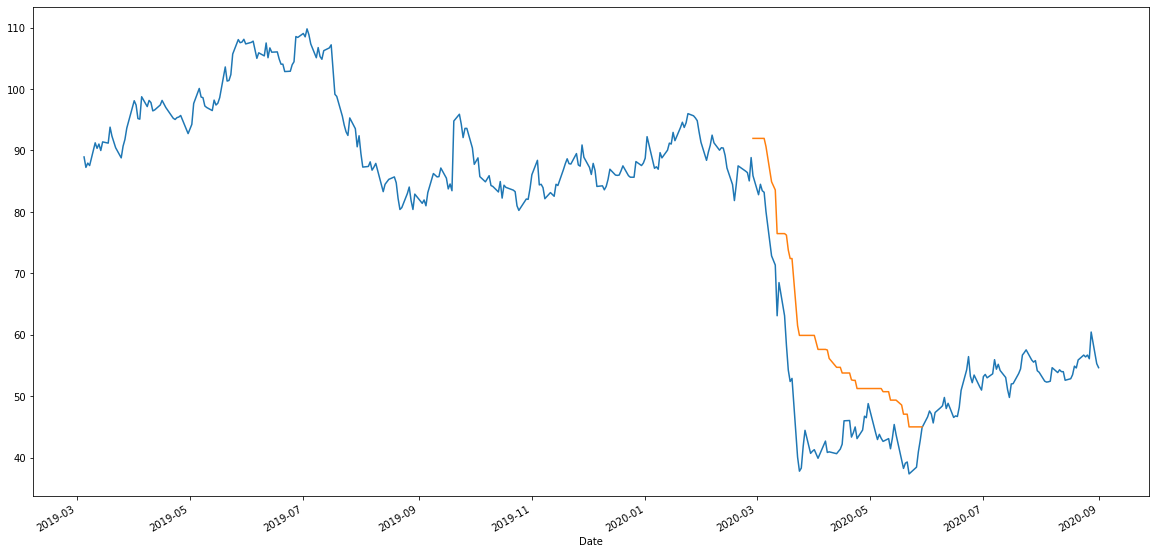

In [17]:
fig, ax = plt.subplots(figsize=(20,10),sharex = False, sharey = False)
data.loc[data.index, 'Close'].plot(ax=ax)
df1.loc[df1.index, 'new_stop_loss'].plot(ax=ax)